In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

In [4]:
!pip install seaborn

In [5]:
import seaborn as sns
sns.set()

In [6]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
#加载gps坐标数据，使用日期作为整套索引
#数据文件编码为utf-8：指定为这样可以防止matplotlib被变音符号阻塞
df = pd.read_csv('PTUA2024/Lab06/data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('PTUA2024/Lab06/data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [7]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [8]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


In [9]:
print(df[:5])
print(df.shape)
value_counts=df['country'].value_counts()
value_percentages=df['country'].value_counts(normalize=True)
print(value_counts)
print(value_percentages)

                           lat       lon          city         country
date                                                                  
2014-05-14 09:07:00  51.481292 -0.451011  West Drayton  United Kingdom
2014-05-14 09:22:00  51.474005 -0.450999      Hounslow  United Kingdom
2014-05-14 10:51:00  51.478199 -0.446081      Hounslow  United Kingdom
2014-05-14 11:24:00  51.478199 -0.446081      Hounslow  United Kingdom
2014-05-14 11:38:00  51.474146 -0.451562      Hounslow  United Kingdom
(1759, 4)
country
Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Croatia                    30
Kosovo                     30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: count, dtype: int64
country
S

count      1759
unique       15
top       Spain
freq        646
Name: country, dtype: object


<Axes: xlabel='country'>

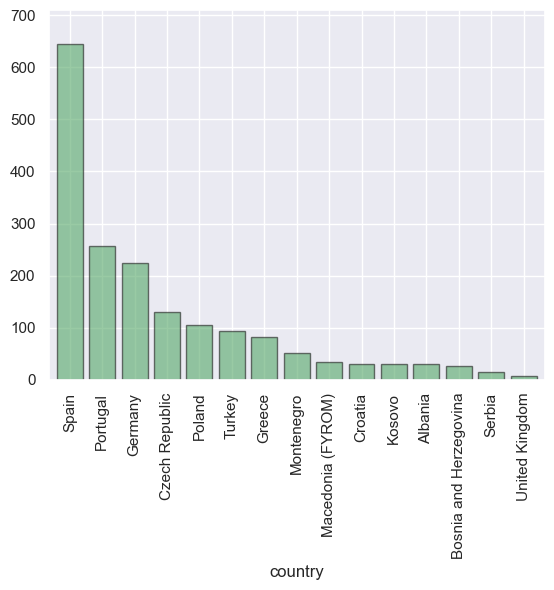

In [10]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim
#Q1：你能用matplotlib和seaborn为访问量最大的国家画一个条形图吗？您可以使用df数据帧。
#请设计图表的样式，使其看起来更好
#例如figsize、width、alpha、color、edgecolor、grid、xlim和ylim
print(df['country'].describe())


country_visits = df['country'].value_counts()
ylim = (0, country_visits.max() * 1.1)
country_visits.plot(kind='bar',alpha=0.6, color='g',edgecolor='k',width=0.8, ylim=ylim)


                   country  count
0                    Spain    646
1                 Portugal    256
2                  Germany    225
3           Czech Republic    130
4                   Poland    104
5                   Turkey     94
6                   Greece     82
7               Montenegro     51
8        Macedonia (FYROM)     34
9                  Croatia     30
10                  Kosovo     30
11                 Albania     29
12  Bosnia and Herzegovina     26
13                  Serbia     15
14          United Kingdom      7


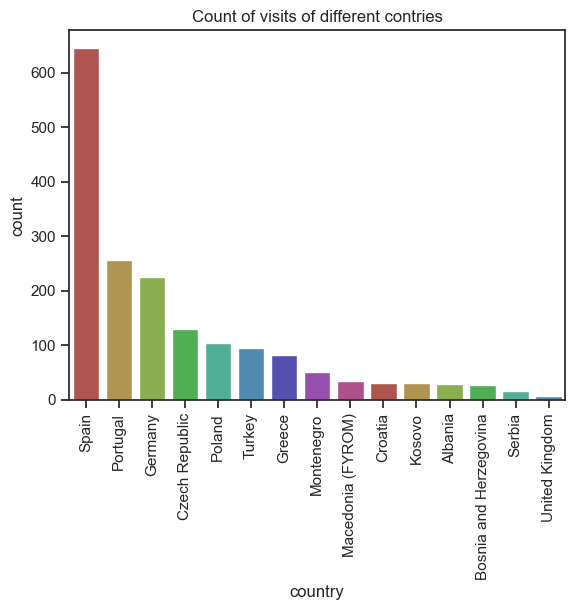

In [11]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
print(country_counts)

sns.set_style("ticks")
ax = sns.barplot(x="country", y="count", data=country_counts, palette=sns.hls_palette(9, l=.5, s=.5))
ax.set_title("Count of visits of different contries")
for item in ax.get_xticklabels():
    item.set_rotation(90)

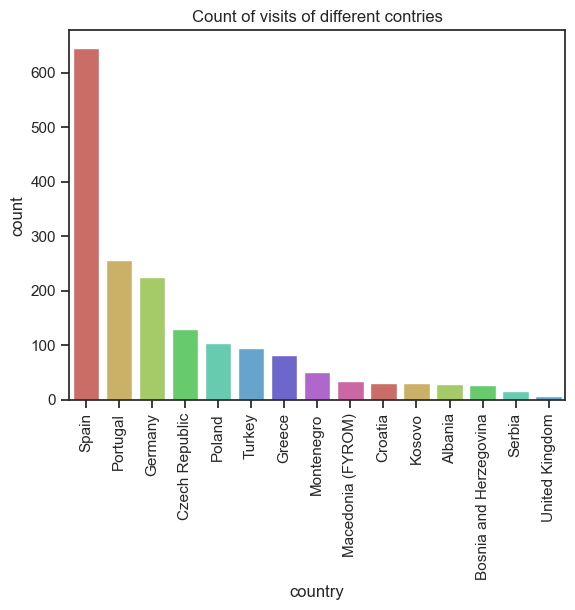

In [12]:
sns.set_style("ticks")
ax = sns.barplot(x="country", y="count", data=country_counts, palette=sns.color_palette("hls", 9))
ax.set_title("Count of visits of different contries")
for item in ax.get_xticklabels():
    item.set_rotation(90)

<Axes: xlabel='country'>

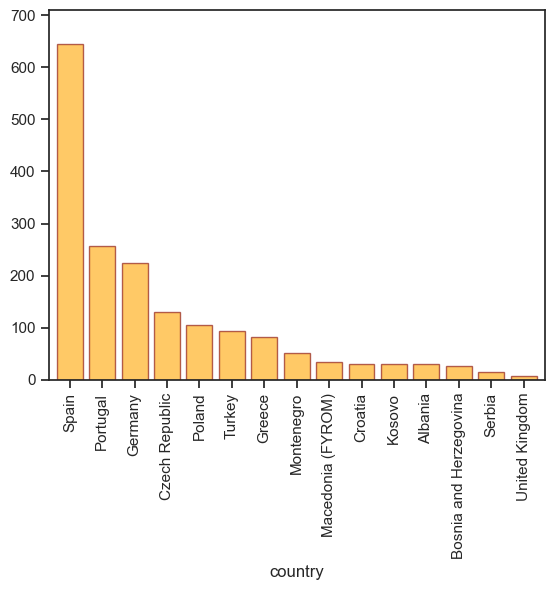

In [18]:
#Now you try: re-create the plot above, but make the bars orange with maroon edges.
country_visits = df['country'].value_counts()
ylim = (0, country_visits.max() * 1.1)
country_visits.plot(kind='bar',alpha=0.6, color='orange', edgecolor='maroon',width=0.8, ylim=ylim)


count          1759
unique          113
top       Barcelona
freq            632
Name: city, dtype: object


<Axes: xlabel='city'>

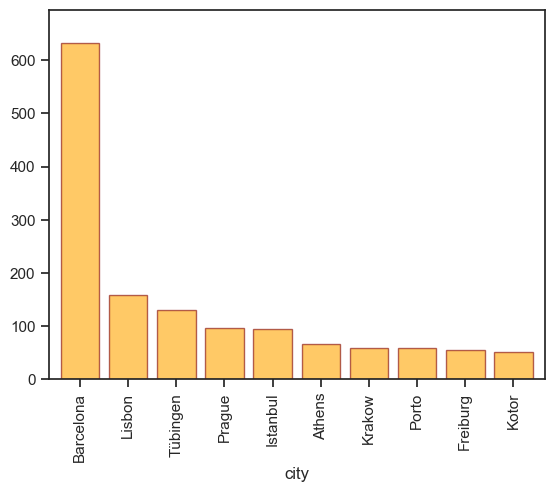

In [20]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
print(df['city'].describe())
#Due to the presence of 113 cities and the low number of visits to most cities, only the top ten cities are displayed
city_visits = df['city'].value_counts()[:10] 
ylim = (0, city_visits.max() * 1.1)
city_visits.plot(kind='bar', alpha=0.6, color='orange', edgecolor='maroon', width=0.8, ylim=ylim)

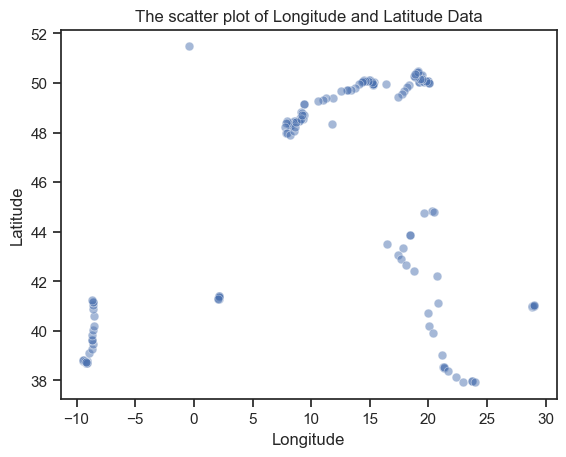

In [28]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 


sns.scatterplot(data=rs, x='lon', y='lat',alpha=0.5, s=40)

plt.title('The scatter plot of Longitude and Latitude Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

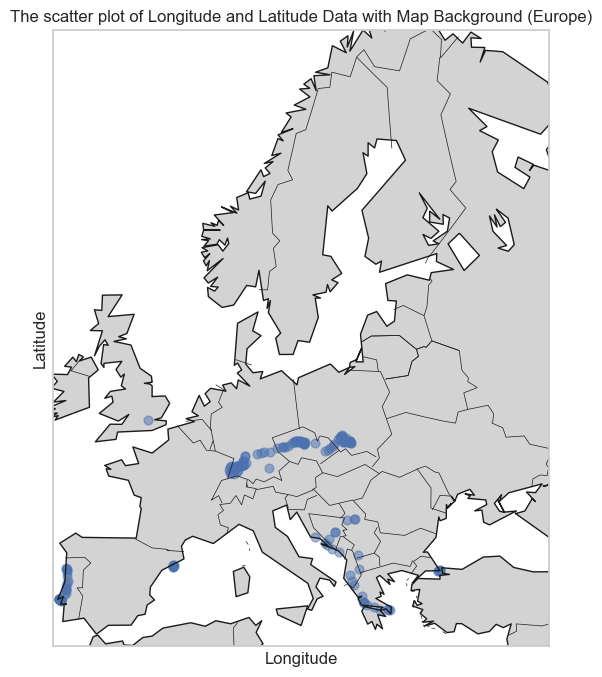

In [41]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=35, urcrnrlat=70, llcrnrlon=-10, urcrnrlon=40, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', zorder=0)

x, y = m(rs['lon'].values, rs['lat'].values)
m.scatter(x, y, alpha=0.5, s=40)

plt.title('The scatter plot of Longitude and Latitude Data with Map Background (Europe)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

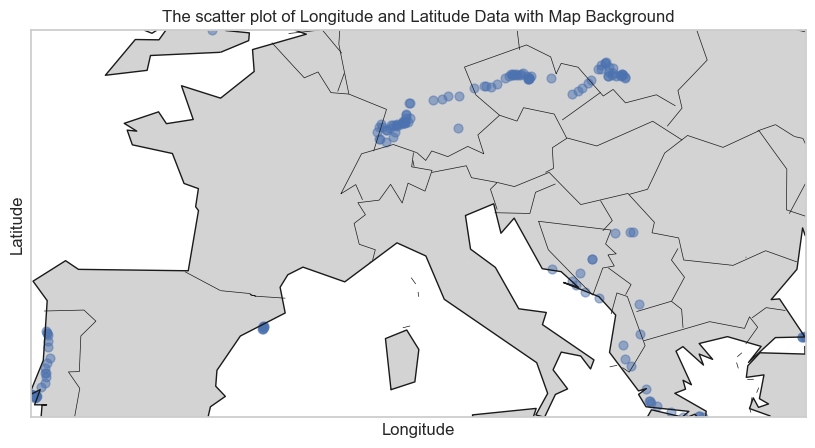

In [42]:
min_lat = rs['lat'].min()
max_lat = rs['lat'].max()
min_lon = rs['lon'].min()
max_lon = rs['lon'].max()

plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', zorder=0)

x, y = m(rs['lon'].values, rs['lat'].values)
m.scatter(x, y, alpha=0.5, s=40)

plt.title('The scatter plot of Longitude and Latitude Data with Map Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [29]:
#Line charts, with annotation
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

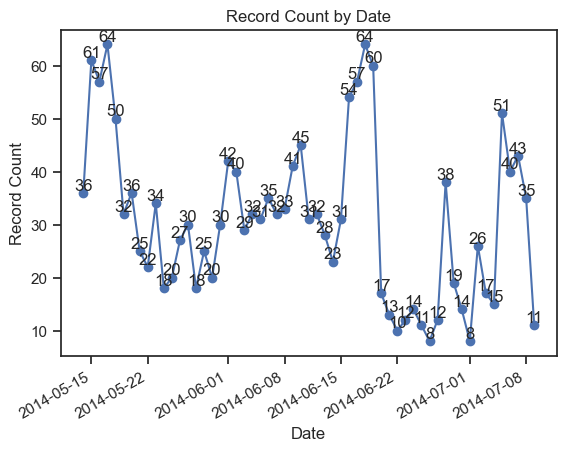

In [30]:
plt.plot(countdata.index, countdata.values, marker='o', linestyle='-')

plt.title('Record Count by Date')
plt.xlabel('Date')
plt.ylabel('Record Count')

for i, count in enumerate(countdata.values):
    plt.text(countdata.index[i], count, str(count), ha='center', va='bottom')

plt.gcf().autofmt_xdate()
plt.show()

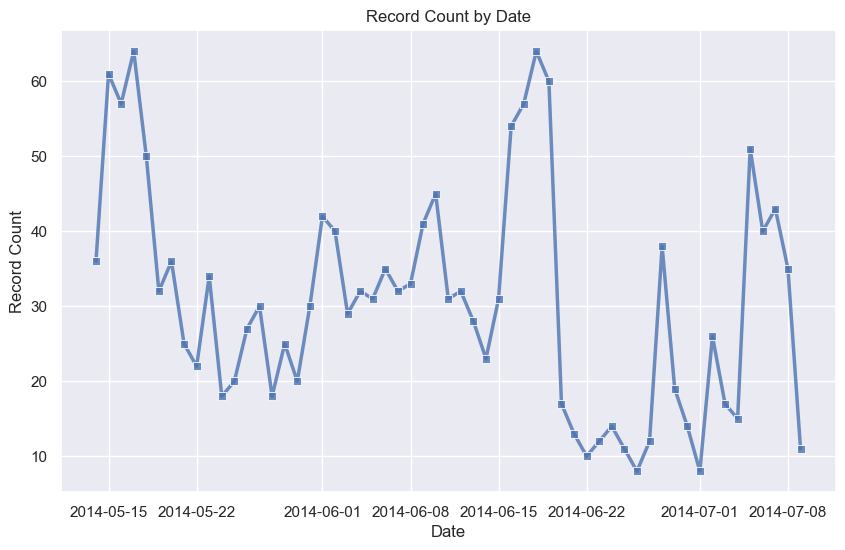

In [34]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 
# Style settings
sns.set_style("darkgrid")  # Set the Seaborn style
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the line chart
sns.lineplot(data=countdata, marker='s', linewidth=2.5, alpha=0.8)

# Title and labels
plt.title('Record Count by Date')
plt.xlabel('Date')
plt.ylabel('Record Count')

# Show the plot
plt.show()

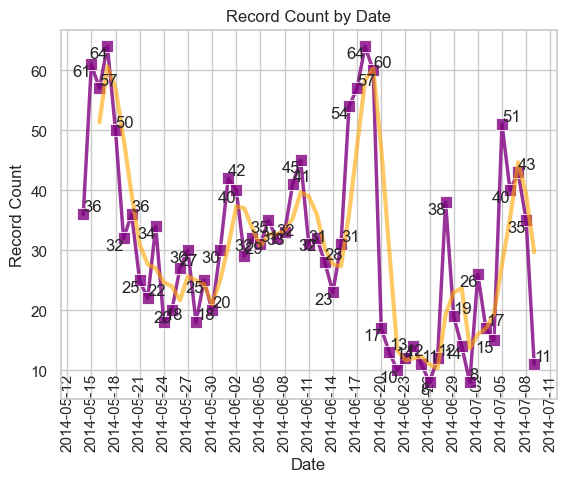

In [37]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

sns.set_style("whitegrid")
sns.lineplot(data=countdata, marker='s', markersize=8, linewidth=2.5, color='purple', alpha=0.8)

plt.title('Record Count by Date')
plt.xlabel('Date')
plt.ylabel('Record Count')

# Adjusting tick marks
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=3))

# Adding annotations with different positions
for i, count in enumerate(countdata.values):
    plt.text(countdata.index[i], count, str(count), ha='left' if i % 2 == 0 else 'right', va='bottom' if i % 2 == 0 else 'top')

# Smoothing the line
sns.lineplot(data=countdata.rolling(window=3).mean(), linewidth=3, color='orange', alpha=0.6)
#对于平滑的线条，由于使用了滚动平均，将数据进行了平滑处理，因此在视觉上可能与原始数据的线条有较大的差别。
#原始数据的线条反映了数据的实际变化情况，而平滑后的线条则更加平稳，减少了数据中的噪声和突发性波动。这种差别是正常的，特别是在滚动平均窗口较大时，平滑的效果会更加明显。
#如果你希望平滑后的线条更接近原始数据的趋势，可以尝试减小滚动平均的窗口大小，或者尝试其他平滑技术来调整平滑的效果。
# Rotate and align the x-axis labels vertically
plt.xticks(rotation=90, va='center')

plt.show()

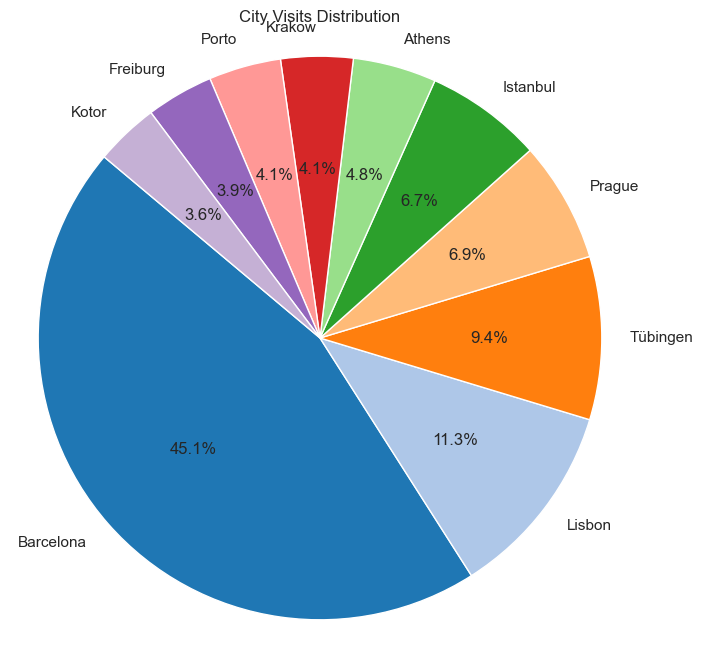

In [43]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

plt.figure(figsize=(8, 8))  
plt.pie(city_visits, labels=city_visits.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('City Visits Distribution')
plt.axis('equal') 
plt.show()

In [52]:
# Q7: can you visualize the GPS points by using Kepler.gl? 
# Here are some examples: https://docs.kepler.gl/docs/keplergl-jupyter

#!!!The error message indicates that there was an issue loading the keplergl-jupyter module, specifically the KeplerGlModal model class. 
#This could be due to various reasons such as missing or incompatible dependencies, network issues, or incorrect installation.
from keplergl import KeplerGl
from geopandas import GeoDataFrame
import geopandas as gpd
gdf = gpd.GeoDataFrame(rs, geometry=gpd.points_from_xy(rs.lon, rs.lat))


map_1 = KeplerGl()

map_1.add_data(data=gdf, name='gps_data')

map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\Claire\anaconda3\Lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: text/html formatter returned invalid type <class 'bytes'> (expected <class 'str'>) for object: KeplerGl(data={'gps_data': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157], 'columns': ['lat', 'lon', 'date', 'city', 'country', 'geometry'], 'data': [[51.4781991000000

KeplerGl(data={'gps_data': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20…